In [2]:
import numpy as np
from sklearn.preprocessing import quantile_transform
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import os 


In [3]:
#Data reading 
data_dir ='/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_DATA/ponderful_DATA_updated'
Phy_Che_file = os.path.join(data_dir,'Phy_Che_qt.pkl')
Phy_Che= pd.read_pickle('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.pkl')
display(Phy_Che)

,Pond_ID,PondCode,X,Y,Pondscape,Country,Strat_Survey,Resampling,season_col,pH,...,Cropland_500.t,Forest_500.t,Pastures.and.open.nature_500.t,Urban_500.t,Aquatic_500_qt,Cropland_500_qt,Forest_500_qt,Pastures.and.open.nature_500_qt,Urban_500_qt,Natural_5_qt
1,BE048,AW1_NA1,5.032370,51.327590,Antwerp,Belgium,1,0,Spring,6.355,...,-0.402250,0.910612,-0.067940,-0.654950,0.000000,-0.570731,0.899016,-0.067940,-2.393980,-2.361894
2,BE049,AW1_IN2,5.002750,51.329040,Antwerp,Belgium,1,0,Spring,6.305,...,-0.459558,1.063622,-0.346234,0.579132,0.210428,-0.639147,1.052930,-0.346234,0.318639,-0.276950
3,BE050,AW1_EX1,5.032560,51.362150,Antwerp,Belgium,1,0,Spring,6.005,...,0.357345,0.357345,-0.036563,-0.183805,0.000000,0.271036,0.341070,-0.036563,-0.718868,-0.045591
4,BE051,AW1_NA2,4.922010,51.358100,Antwerp,Belgium,1,0,Spring,7.195,...,-0.152026,0.413601,0.459558,0.078412,0.593821,-0.282875,0.397935,0.459558,-0.318639,0.000000
5,BE052,AW1_IN1,5.016750,51.343080,Antwerp,Belgium,1,0,Spring,5.900,...,-0.026114,0.269558,0.591528,-0.554602,0.000000,-0.142907,0.252250,0.591528,-1.618497,-0.453762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,URG026,VCL2,-54.749753,-34.383481,Valle del Cordillera,Uruguay,1,1,Spring,7.880,...,-1.731664,-0.776422,1.665398,-1.150349,0.000000,0.000000,-0.822105,1.665398,0.000000,0.000000
237,URG027,VCL3,-54.747753,-34.384983,Valle del Cordillera,Uruguay,1,1,Spring,7.800,...,-1.731664,-0.194437,1.343325,-1.150349,0.000000,0.000000,-0.219486,1.343325,0.000000,-2.361894
238,URG028,VCH1,-54.759703,-34.383453,Valle del Cordillera,Uruguay,1,1,Spring,9.610,...,-0.335166,-1.181259,1.369531,-0.390951,0.000000,-0.491989,-1.260117,1.369531,-1.123769,0.000000
239,URG029,VCH2,-54.767964,-34.379486,Valle del Cordillera,Uruguay,1,1,Spring,8.470,...,-0.324138,-0.604016,1.140287,-1.150349,0.000000,-0.479169,-0.641518,1.140287,0.000000,0.000000


In [6]:
lu_5m_file = os.path.join(data_dir,'D2.4_LandUse_5m_20240516.csv')
lu_5m= pd.read_csv(lu_5m_file)
display(lu_5m)

,PondCode,AssessmentDate,Perimeter,Woodland,Moorland,Rank_veg,Unimp_grassland,Semimp_grassland,Imp_grassland,Arable,Urban,Rock,Marsh,Streams,Other,Detail_OtherHabitatType,NOTES
0,AW1_EX1,18/10/2021,5,2,20,0,20,0,0,0,0,0,58,0,0,NaN,NaN
1,AW1_EX2,08/10/2021,5,35,15,0,50,0,0,0,0,0,0,0,0,NaN,NaN
2,AW1_IN1,18/10/2021,5,1,0,0,38,0,0,0,0,0,56,5,0,NaN,NaN
3,AW1_IN2,08/10/2021,5,40,0,0,0,30,0,0,0,0,30,0,0,NaN,NaN
4,AW1_NA1,08/10/2021,5,2,0,0,98,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,KA4,12/06/2023,5,20,5,60,0,0,0,0,0,15,0,0,0,NaN,0.0
347,KA6,02/06/2023,5,40,5,45,0,0,0,0,1,3,5,1,0,NaN,0.0
348,SO2,07/06/2023,5,3,10,60,0,0,0,0,10,15,0,2,0,NaN,0.0
349,SO4,07/06/2023,5,4,1,60,12,0,0,0,5,5,10,3,0,NaN,0.0


In [7]:
lu_5m=lu_5m.sort_values('AssessmentDate',ascending=True)

In [8]:
lu_5m

,PondCode,AssessmentDate,Perimeter,Woodland,Moorland,Rank_veg,Unimp_grassland,Semimp_grassland,Imp_grassland,Arable,Urban,Rock,Marsh,Streams,Other,Detail_OtherHabitatType,NOTES
51,LIE_09,01/06/2021,5,5,0,90,0,5,0,0,0,0,0,0,0,NaN,NaN
50,LIE_12,01/06/2021,5,10,0,90,0,0,0,0,0,0,0,0,0,NaN,NaN
82,MUN_201,01/06/2022,5,70,0,15,0,15,0,0,0,0,0,0,0,NaN,NaN
336,SO3,01/06/2022,5,20,0,15,30,10,0,0,0,10,15,0,0,NaN,0.0
81,MUN_105,01/06/2022,5,0,0,100,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,MUN_51,31/05/2021,5,3,0,0,0,97,0,0,0,0,0,0,0,NaN,NaN
45,MUN_44,31/05/2021,5,0,0,0,0,100,0,0,0,0,0,0,0,NaN,NaN
80,MUN_41,31/05/2022,5,0,0,0,100,0,0,0,0,0,0,0,0,NaN,NaN
72,MUN_56,31/05/2022,5,90,0,0,10,0,0,0,0,0,0,0,0,NaN,NaN


In [9]:
lu_5m=lu_5m.drop_duplicates(subset='PondCode',keep='first')

In [19]:
lu_5m.columns =['PondCode', 'AssessmentDate', 'Perimeter', 'Woodland_5m', 'Moorland_5m',
       'Rank_veg_5m', 'Unimp_grassland_5m', 'Semimp_grassland_5m', 'Imp_grassland_5m',
       'Arable_5m', 'Urban_5m', 'Rock_5m', 'Marsh_5m', 'Streams_5m', 'Other_5m',
       'Detail_OtherHabitatType', 'NOTES']

In [20]:
lu_5m

,PondCode,AssessmentDate,Perimeter,Woodland_5m,Moorland_5m,Rank_veg_5m,Unimp_grassland_5m,Semimp_grassland_5m,Imp_grassland_5m,Arable_5m,Urban_5m,Rock_5m,Marsh_5m,Streams_5m,Other_5m,Detail_OtherHabitatType,NOTES
51,LIE_09,01/06/2021,5,5,0,90,0,5,0,0,0,0,0,0,0,NaN,NaN
50,LIE_12,01/06/2021,5,10,0,90,0,0,0,0,0,0,0,0,0,NaN,NaN
82,MUN_201,01/06/2022,5,70,0,15,0,15,0,0,0,0,0,0,0,NaN,NaN
336,SO3,01/06/2022,5,20,0,15,30,10,0,0,0,10,15,0,0,NaN,0.0
81,MUN_105,01/06/2022,5,0,0,100,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,RHO036d,30/06/2021,5,0,0,5,95,0,0,0,0,0,0,0,0,NaN,NaN
111,MEY9931,30/06/2021,5,2,0,20,8,2,0,0,0,0,68,0,0,NaN,NaN
112,MEY9932,30/06/2021,5,10,0,60,30,0,0,0,0,0,0,0,0,NaN,NaN
44,MUN_51,31/05/2021,5,3,0,0,0,97,0,0,0,0,0,0,0,NaN,NaN


In [10]:
len(set(list(lu_5m.index)))

279

In [11]:
Phy_Che.columns

Index(['Pond_ID', 'PondCode', 'X', 'Y', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col', 'pH', 'O2_con', 'O2_sat', 'Turb', 'Sludge',
       'Snel', 'Cond', 'T', 'TN', 'TP', 'DOC', 'TOC', 'CHLa', 'PC',
       'Sulphates', 'Chlorides', 'Alkalinity', 'Ca', 'Mg', 'Na', 'K', 'TSS',
       'N.NO3', 'P.PO4', 'N.NH4', 'N.NO2', 'CHLa_Spectro', 'N.NO23', 'Fe',
       'Secchi_Depth', 'CHLa_RFU', 'PC_RFU', 'TDN', 'OM', 'year',
       'Hydeoperiod_length', 'bio1', 'bio4', 'bio5', 'bio6', 'bio7', 'bio12',
       'bio15', 'bio17', 'Nat_res', 'Area', 'Depth', 'Pond_dries',
       'Rel_waterlev', 'PVI', 'Animals_cont', 'lifestockQ', 'Natural_5',
       'Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500', 'ECELS', 'bio1.t',
       'bio4.t', 'bio5.t', 'bio6.t', 'bio7.t', 'bio12.t', 'bio15.t', 'bio17.t',
       'Area.t', 'Depth.t', 'Animals_cont.t', 'Hydeoperiod_length.t',
       'ECELS.t', 'Natural_5.t', 'Aquatic_500.t', 'Cropland_500.

In [12]:
lu_5m.columns

Index(['PondCode', 'AssessmentDate', 'Perimeter', 'Woodland', 'Moorland',
       'Rank_veg', 'Unimp_grassland', 'Semimp_grassland', 'Imp_grassland',
       'Arable', 'Urban', 'Rock', 'Marsh', 'Streams', 'Other',
       'Detail_OtherHabitatType', 'NOTES'],
      dtype='object')

In [23]:
test=Phy_Che.merge(lu_5m,on='PondCode',how='left')

In [24]:
test.columns

Index(['Pond_ID', 'PondCode', 'X', 'Y', 'Pondscape', 'Country', 'Strat_Survey',
       'Resampling', 'season_col', 'pH',
       ...
       'Semimp_grassland_5m', 'Imp_grassland_5m', 'Arable_5m', 'Urban_5m',
       'Rock_5m', 'Marsh_5m', 'Streams_5m', 'Other_5m',
       'Detail_OtherHabitatType', 'NOTES'],
      dtype='object', length=109)

In [25]:
test['Natural_5']==test['Moorland_5m'] + test['Rank_veg_5m'] + test['Woodland_5m'] + test['Marsh_5m'] + test['Other_5m']

0      True
1      True
2      True
3      True
4      True
       ... 
235    True
236    True
237    True
238    True
239    True
Length: 240, dtype: bool

In [27]:
phy_che_qt=test[['Natural_5','Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500', 'Unimp_grassland_5m', 'Semimp_grassland_5m', 'Imp_grassland_5m',
       'Arable_5m', 'Urban_5m', 'Rock_5m',  'Streams_5m', ]]
    

<Axes: ylabel='Frequency'>

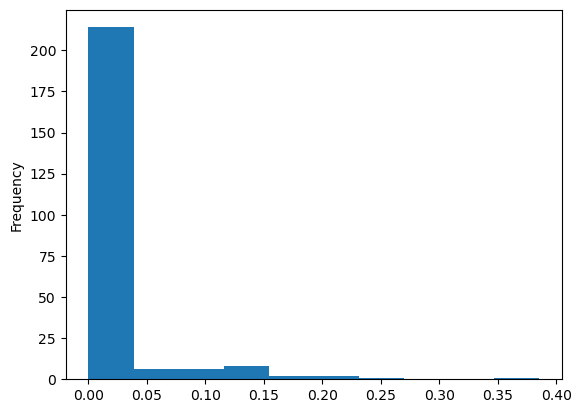

In [ ]:
Phy_Che['Aquatic_500'].plot.hist()

### Histogram before transformation

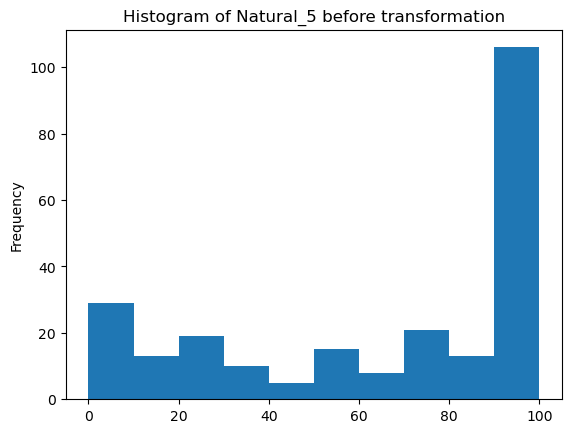

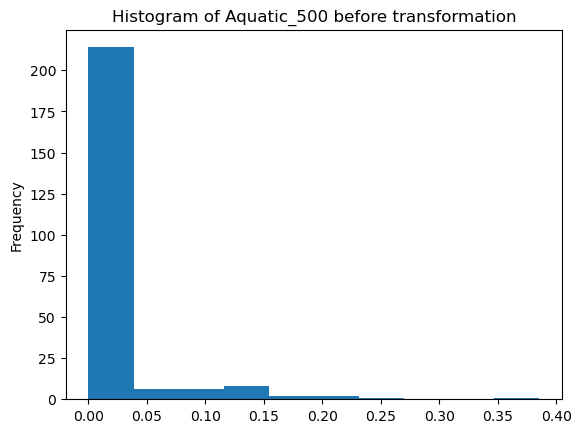

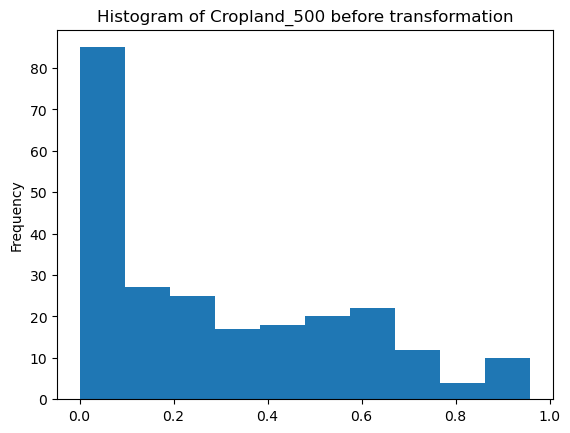

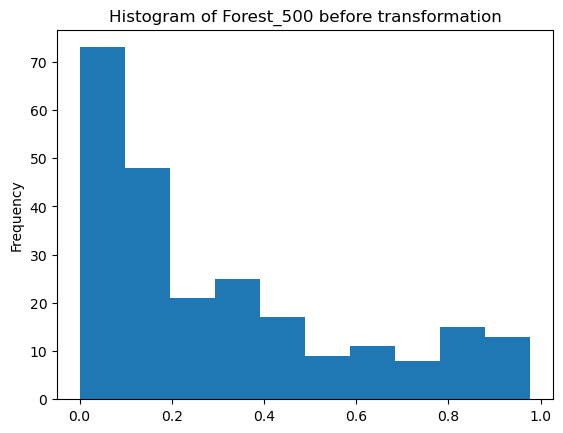

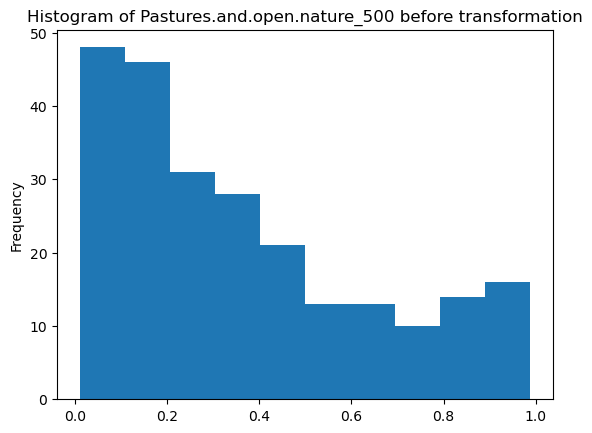

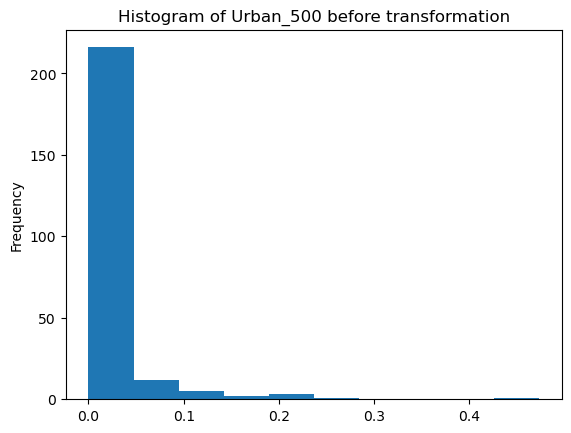

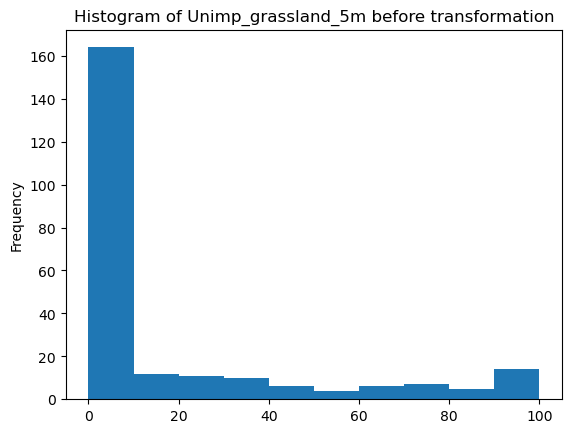

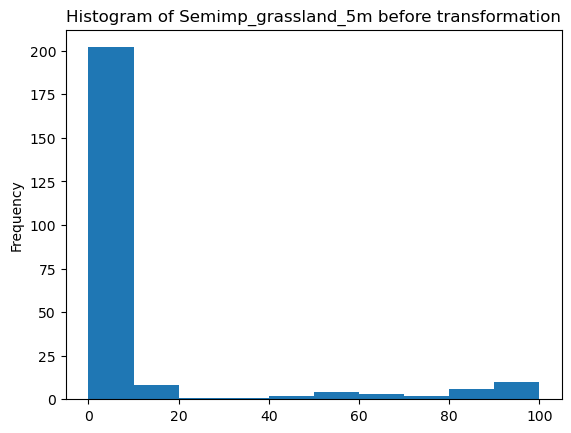

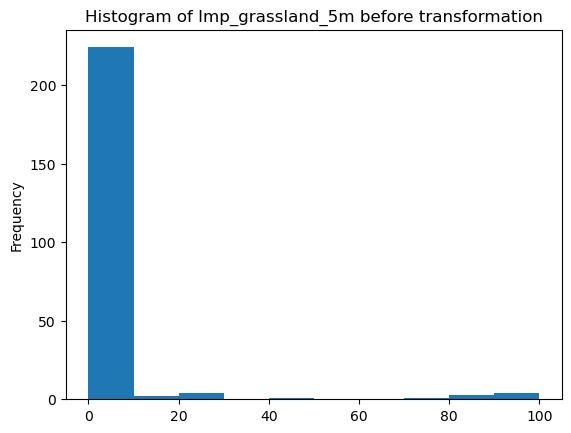

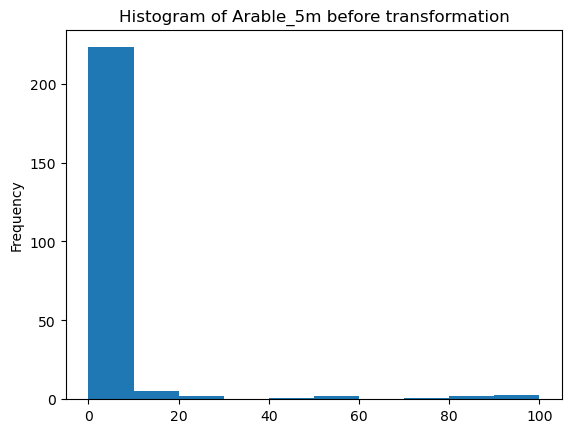

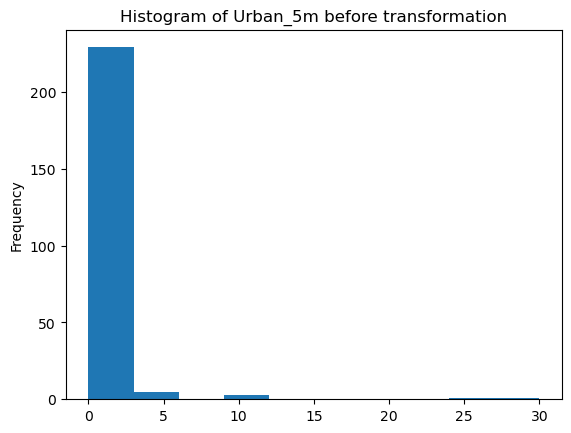

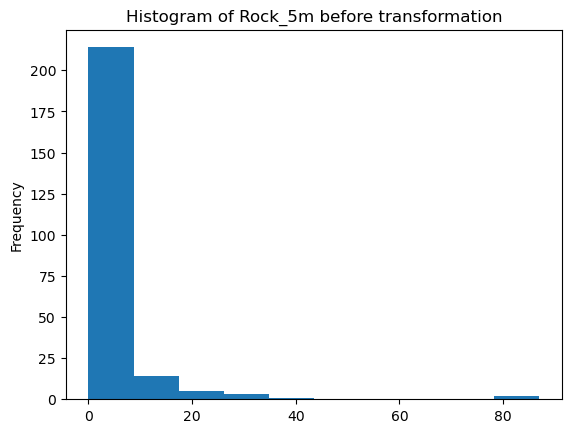

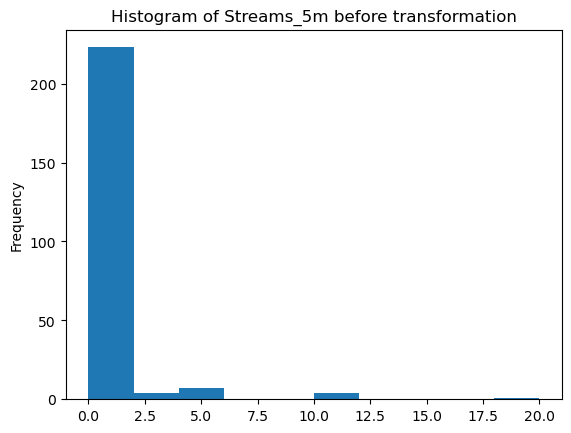

In [28]:
for i in phy_che_qt:
    fig = plt.figure()
    phy_che_qt[i].plot.hist()
    plt.title(f'Histogram of {i} before transformation')

### Histogram of previous realized transformation

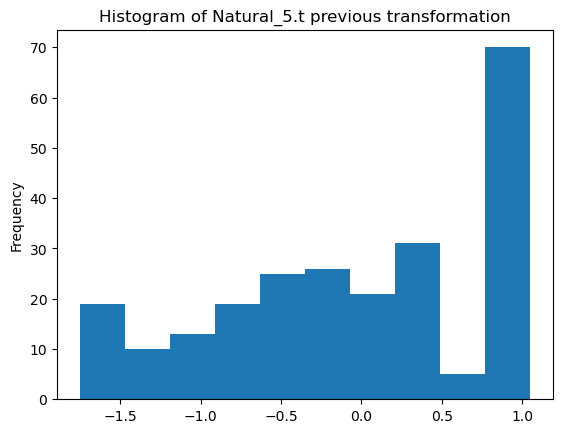

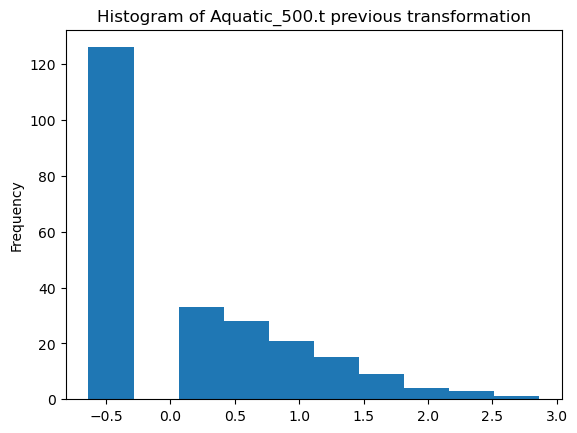

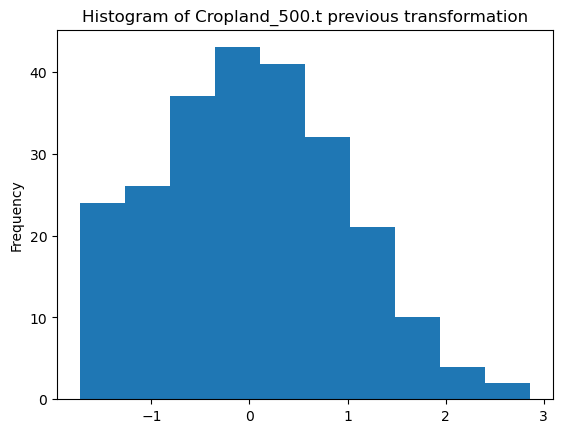

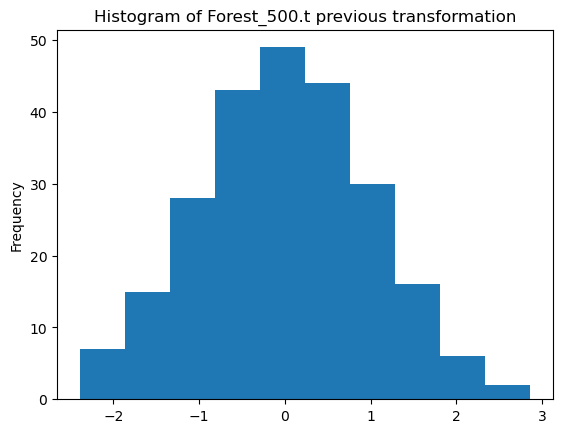

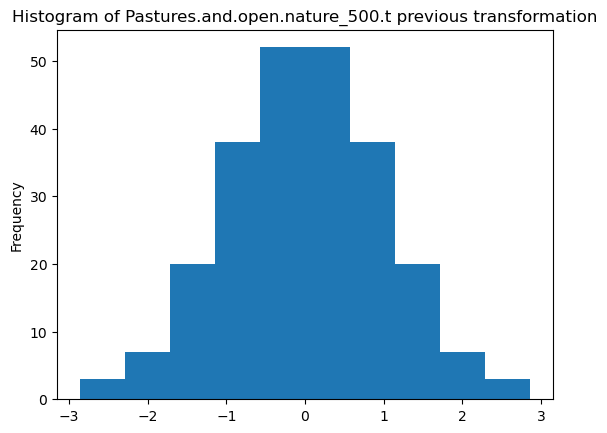

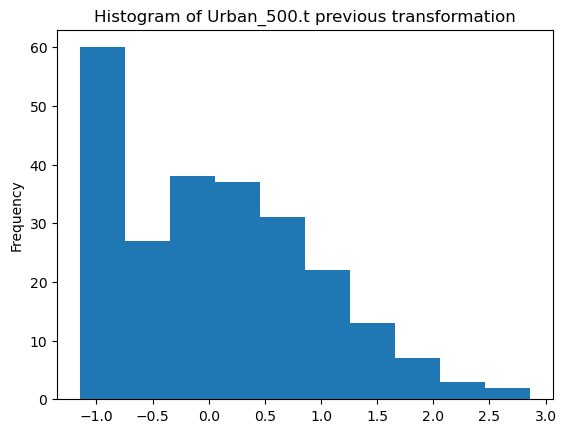

In [ ]:
for i in ['Natural_5.t', 'Aquatic_500.t', 'Cropland_500.t',
       'Forest_500.t', 'Pastures.and.open.nature_500.t', 'Urban_500.t']:
    fig = plt.figure()
    Phy_Che[i].plot.hist()
    plt.title(f'Histogram of {i} previous transformation')

### Normal quantile normalization

In [29]:
percentiles_97th = phy_che_qt.apply(lambda col: np.percentile(col[col > 0], 97))


In [30]:
percentiles_97th

Natural_5                       100.000000
Aquatic_500                       0.194859
Cropland_500                      0.880488
Forest_500                        0.944668
Pastures.and.open.nature_500      0.947260
Urban_500                         0.161553
Unimp_grassland_5m              100.000000
Semimp_grassland_5m             100.000000
Imp_grassland_5m                100.000000
Arable_5m                       100.000000
Urban_5m                         28.350000
Rock_5m                          74.400000
Streams_5m                       15.200000
dtype: float64

In [31]:
def normal_quantile_normalization(col):
    non_zero_col = col[col > 0]  # Exclude zeros
    ranks = stats.rankdata(non_zero_col)
    normalized_data = stats.norm.ppf((ranks - 0.5) / len(non_zero_col))
    full_normalized_col = pd.Series(data=col, index=col.index)  # Reconstruct with original zeros
    full_normalized_col[col > 0] = normalized_data
    return full_normalized_col

# Apply normalization to each column
phy_che_qt_final = phy_che_qt.apply(normal_quantile_normalization)

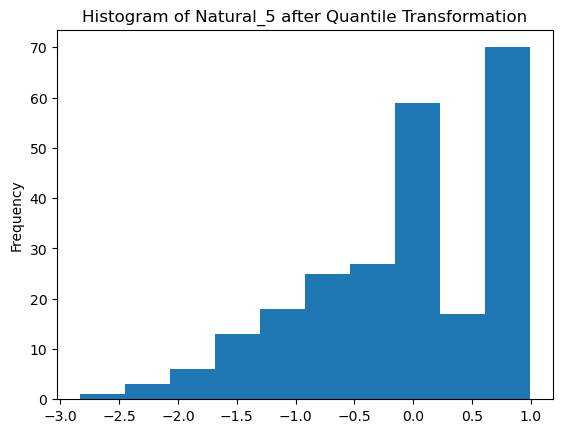

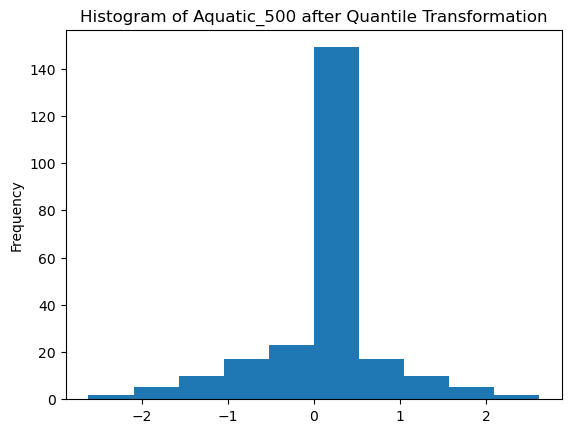

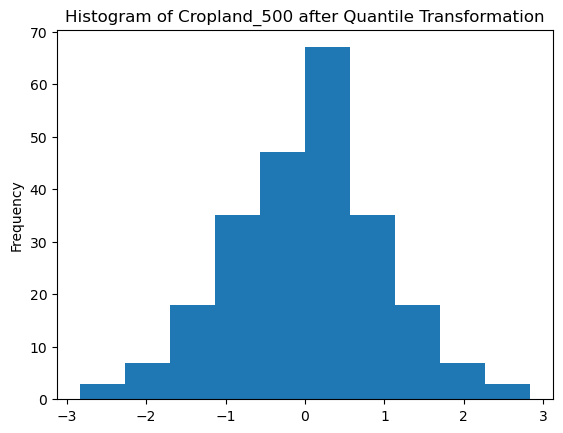

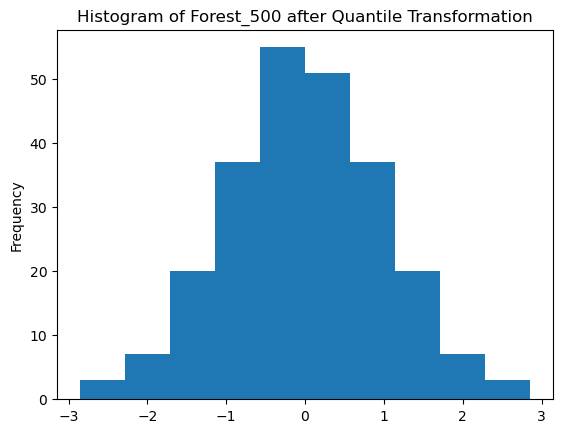

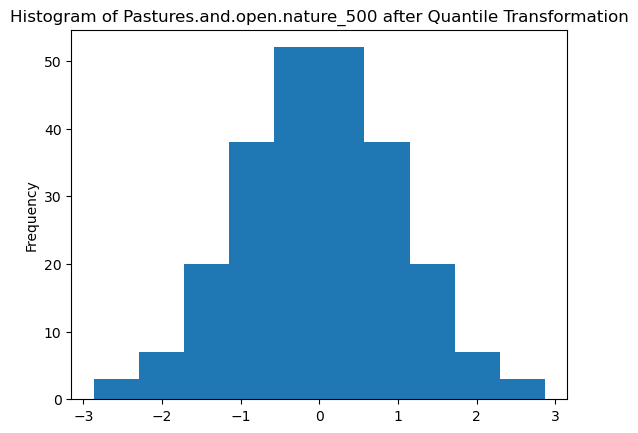

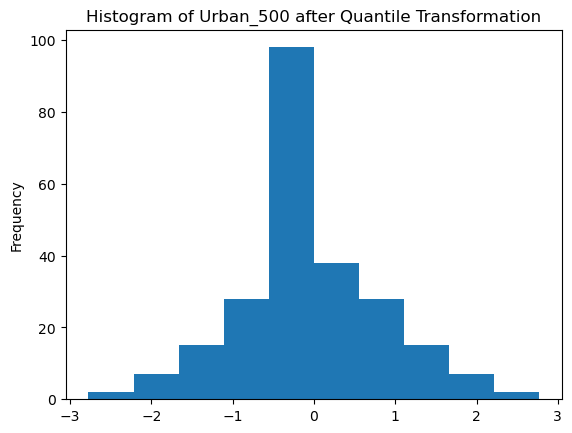

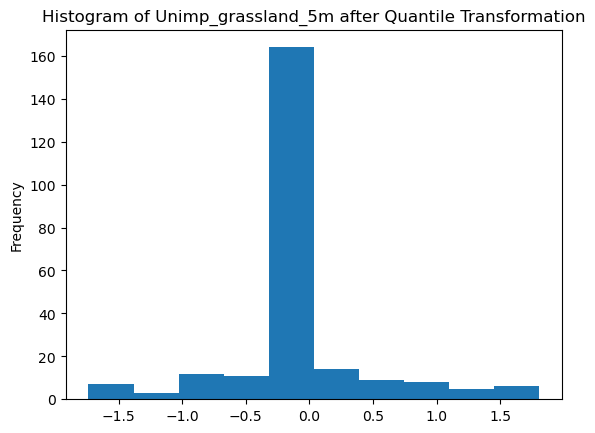

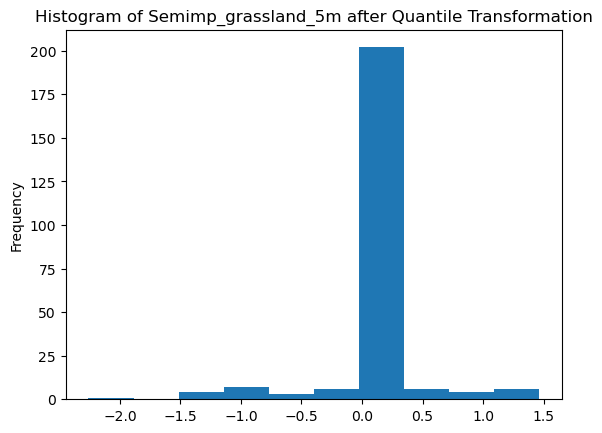

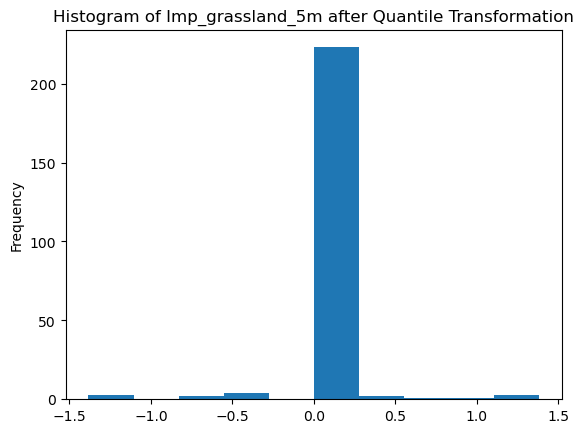

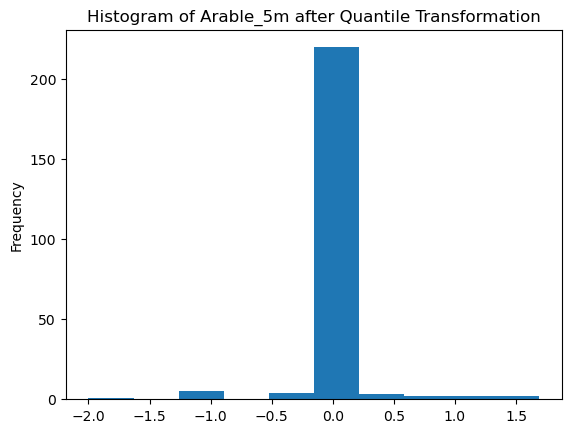

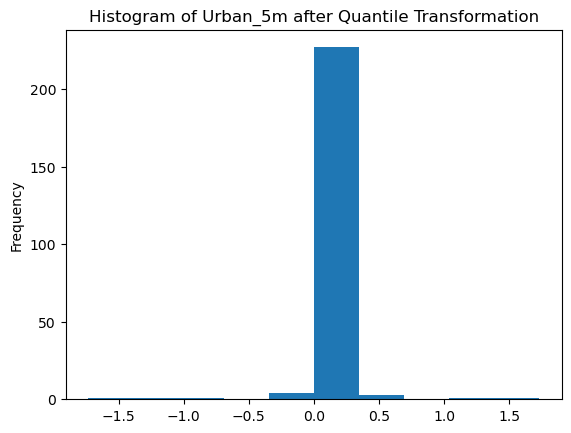

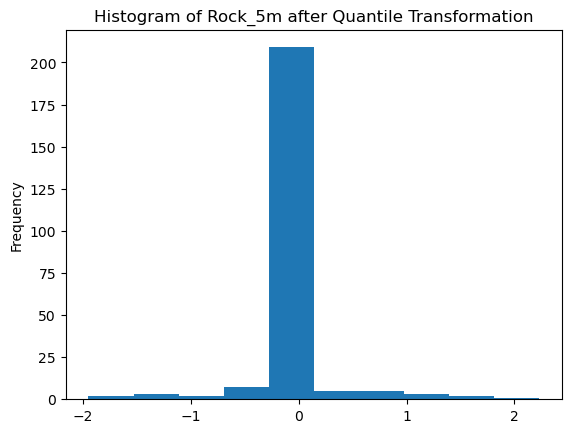

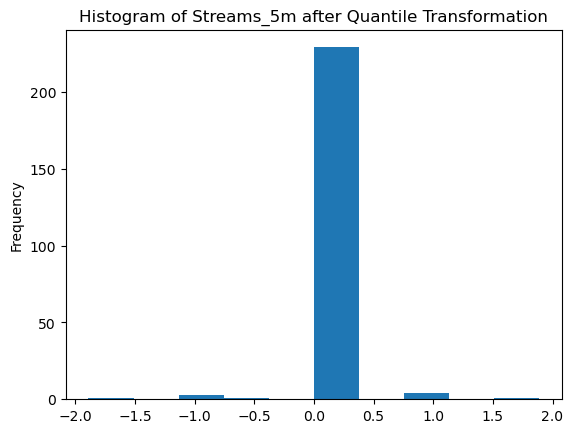

In [32]:
for i in phy_che_qt_final.columns:
    fig = plt.figure()
    phy_che_qt_final[i].plot.hist()
    plt.title(f'Histogram of {i} after Quantile Transformation')

In [ ]:
Phy_Che[['Natural_5_qt','Aquatic_500_qt', 'Cropland_500_qt', 'Forest_500_qt',
       'Pastures.and.open.nature_500_qt', 'Urban_500_qt']]= phy_che_qt_final[['Natural_5','Aquatic_500', 'Cropland_500', 'Forest_500',
       'Pastures.and.open.nature_500', 'Urban_500']]

In [ ]:
Phy_Che.to_csv('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.csv')
Phy_Che.to_pickle('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/Phy_Che_qt.pkl')

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/Users/lidiayung/Downloads/biodiversity.xlsx')

In [4]:
df.to_csv('/Users/lidiayung/PhD_project/project_PONDERFUL/ponderful_OUTPUT/biodiversity.csv')